## Yash Garg | LGM | Data Science 
Task-01
Iris Flowers Classification ML Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the Data
db=pd.read_csv(r"C:\Users\yash\Downloads\iris.csv")
db.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Summary
db.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Info
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
db['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
#Data Preprocessing
db.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

array([[<AxesSubplot:title={'center':'SepalLength'}>,
        <AxesSubplot:title={'center':'SepalWidth'}>],
       [<AxesSubplot:title={'center':'PetalLength'}>,
        <AxesSubplot:title={'center':'PetalWidth'}>]], dtype=object)

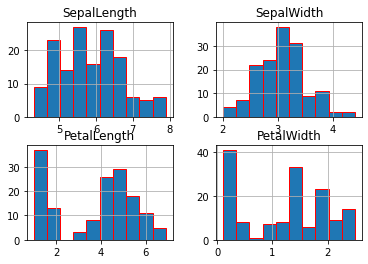

In [7]:
#Data Exploration
db.hist(edgecolor="red")

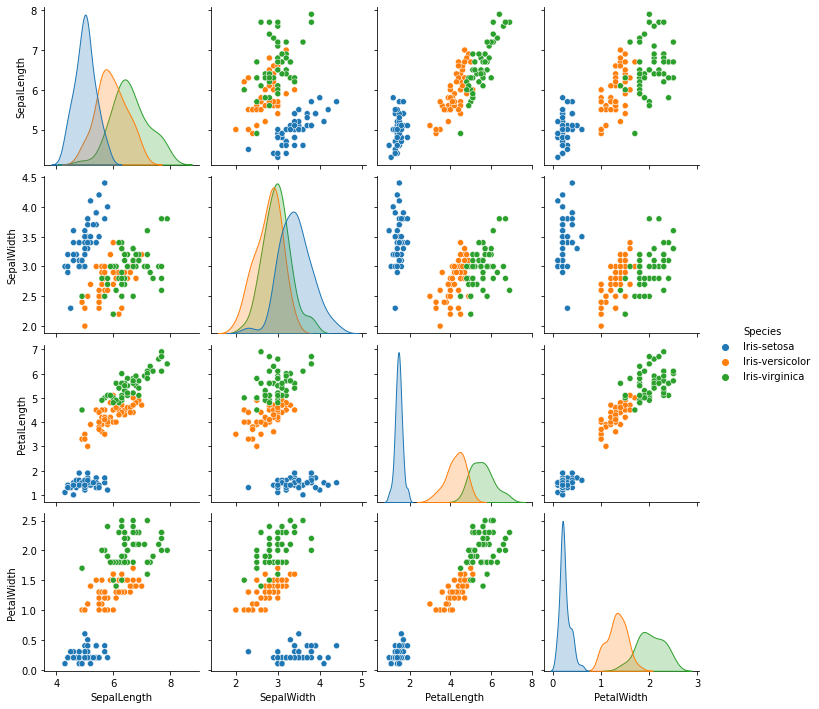

In [9]:
sns.pairplot(db,hue="Species")

In [10]:
#Observation
#All type of flowers are well separable for PetalLenght and PetalWidth
#Also all type of bit of well separable for PetalWidth and SepalWidth

In [11]:
#Data Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

<AxesSubplot:>

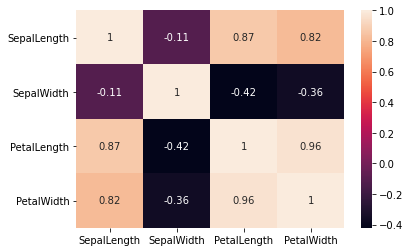

In [12]:
db.corr()

cr1=db.corr()
fig,ax=plt.subplots()
sns.heatmap(cr1,annot=True)

In [13]:
db.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


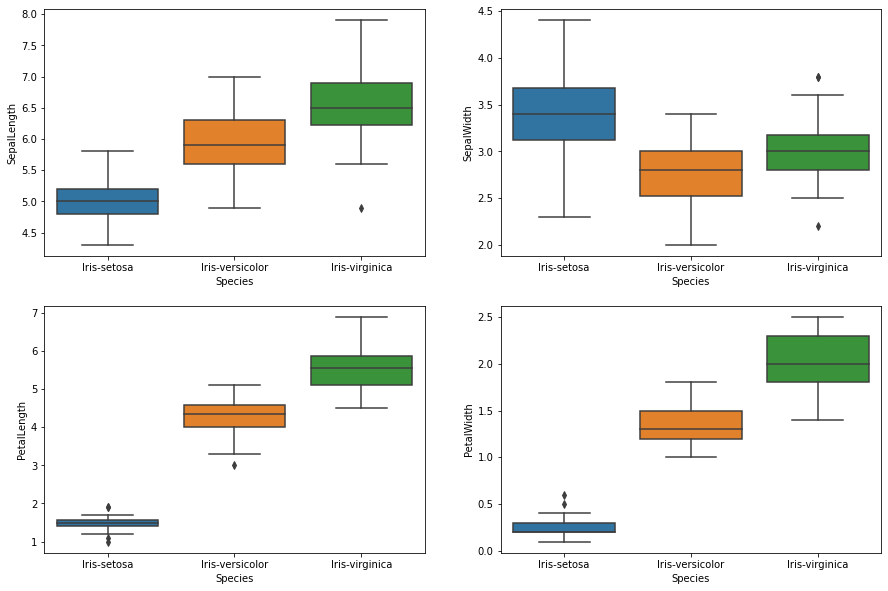

In [14]:
fig, axis = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(x='Species', y='SepalLength', data=db, ax=axis[0,0])
sns.boxplot(x='Species', y='SepalWidth', data=db, ax=axis[0,1])
sns.boxplot(x='Species', y='PetalLength', data=db, ax=axis[1,0])
sns.boxplot(x='Species', y='PetalWidth', data=db, ax=axis[1,1])

plt.show()

In [15]:
#SPLITING DATA SET
X = db.drop(['Species'], axis=1)
y = db['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [16]:
# TEST AND TRAIN SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [17]:

#Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(prediction,y_test))

Logistic Regression accuracy =  0.9777777777777777


In [18]:
#Decision tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(prediction,y_test))

Decision Tree accuracy =  0.9777777777777777


In [19]:
#K-Nearest Neighbors (KNN)
model = KNeighborsClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(prediction,y_test))

KNN accuracy =  0.9777777777777777


In [20]:
#Support vector machine (SVM)
model = svm.SVC()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(prediction,y_test))
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

SVM accuracy =  0.9777777777777777
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
#Conclusion: Accuracy is 97.7%